# Example of SVM

Using the iris database

1. We load the iris data base and assign X to the data and y to the target. Target meaning the small chunk of data that we will be testing X with.

2. We then preprocess that data

3. Creates a random permutation of the data set

4. Select 90% of the data to train the model and 10% for the testing data

5. Inside the for loop we run three different kernel models. There is some fancy aesthetics done too.

    5.1. Create an SVM object and fit to the model
    
    5.2. Circle the test data
    
    5.3. We add color to the plot

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [3]:
n_sample = len(X)

# Creates a random permutation of the data based using n_sample
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

# Selects 90% of the data set
X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]

# Selects the other 10% of the data set
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

print(X_test)

[[6.4 3.1]
 [6.7 3.1]
 [6.1 2.8]
 [6.3 2.8]
 [5.2 2.7]
 [6.3 2.5]
 [7.7 3.8]
 [5.8 2.8]
 [6.2 2.9]
 [5.6 2.7]]


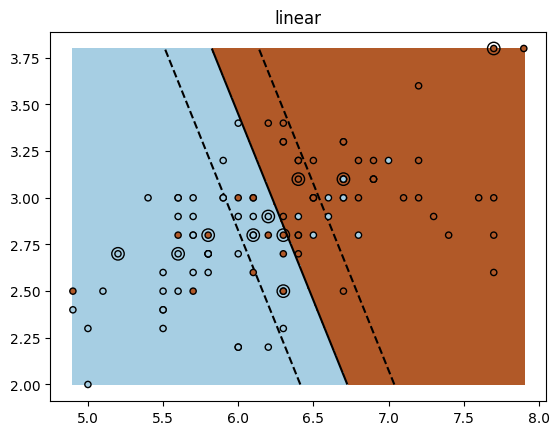

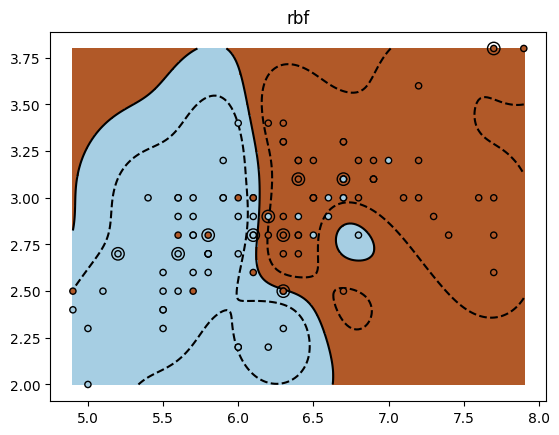

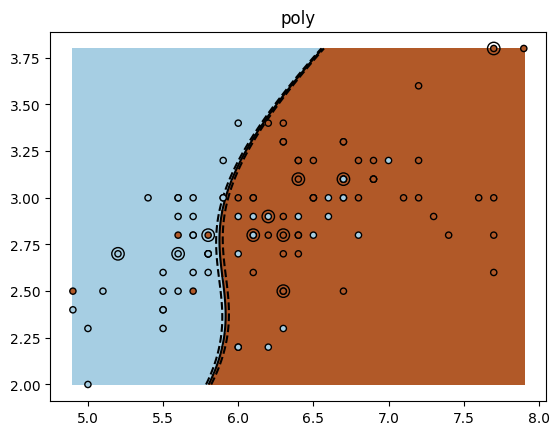

In [5]:
# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()